In [23]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("Output_prova2.csv")

In [38]:
df

,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
0,I,L,L,V,E,NaN,D,NaN,NaN,S,...,-,-,NaN,-,-,-,-,-,-,-
1,-,M,V,V,D,NaN,D,NaN,NaN,S,...,P,E,NaN,E,L,I,S,R,V,-
2,V,L,V,V,D,NaN,D,NaN,NaN,N,...,R,D,NaN,R,L,V,T,A,L,-
3,-,L,L,V,E,NaN,D,NaN,NaN,N,...,P,E,NaN,R,L,Y,G,A,L,-
4,I,L,I,V,D,NaN,D,NaN,NaN,Q,...,G,E,NaN,V,V,R,R,R,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47796,-,L,L,L,E,NaN,R,NaN,NaN,S,...,I,R,NaN,D,L,V,T,T,I,-
47797,I,F,L,A,E,NaN,D,NaN,NaN,E,...,P,K,NaN,R,M,Y,M,-,-,-
47798,V,F,V,V,D,NaN,S,NaN,NaN,D,...,L,E,NaN,S,V,R,A,A,V,-
47799,-,L,I,I,D,NaN,D,NaN,NaN,M,...,-,-,NaN,-,-,-,-,-,-,-


In [48]:
df = df.replace('.',np.nan)
df = df.replace('-',np.nan)

In [28]:
!pip install missingno

In [31]:
import missingno as msno

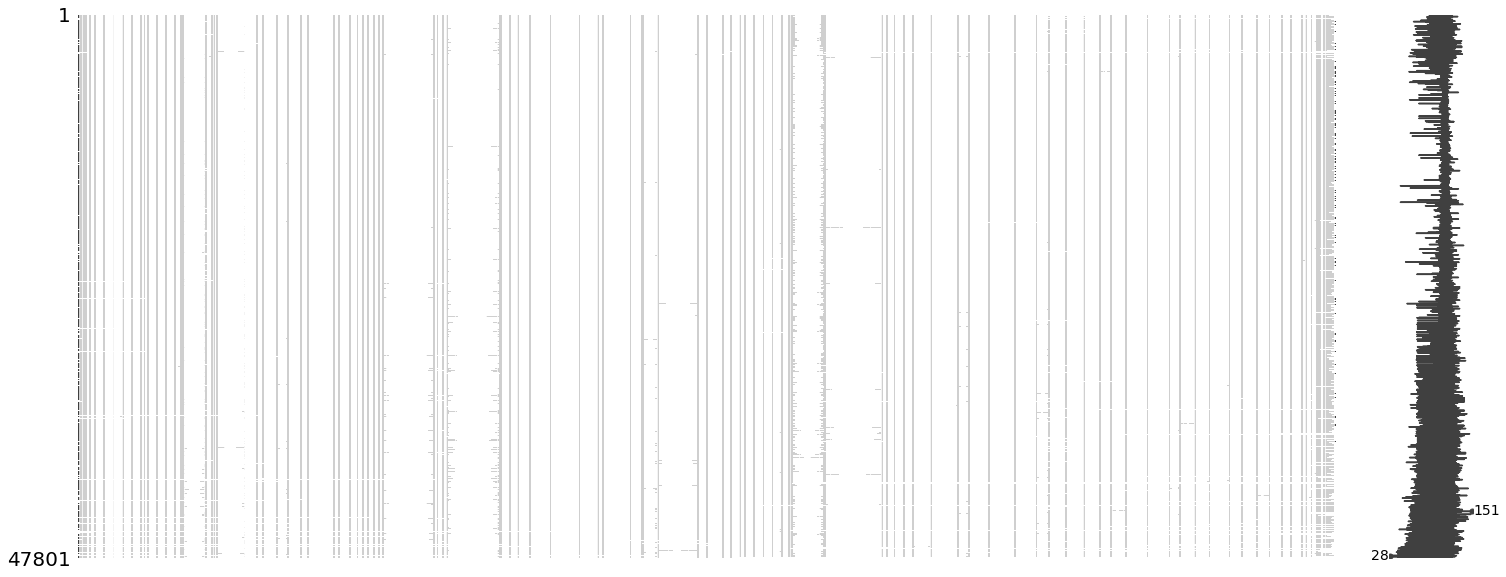

In [49]:
msno.matrix(df)

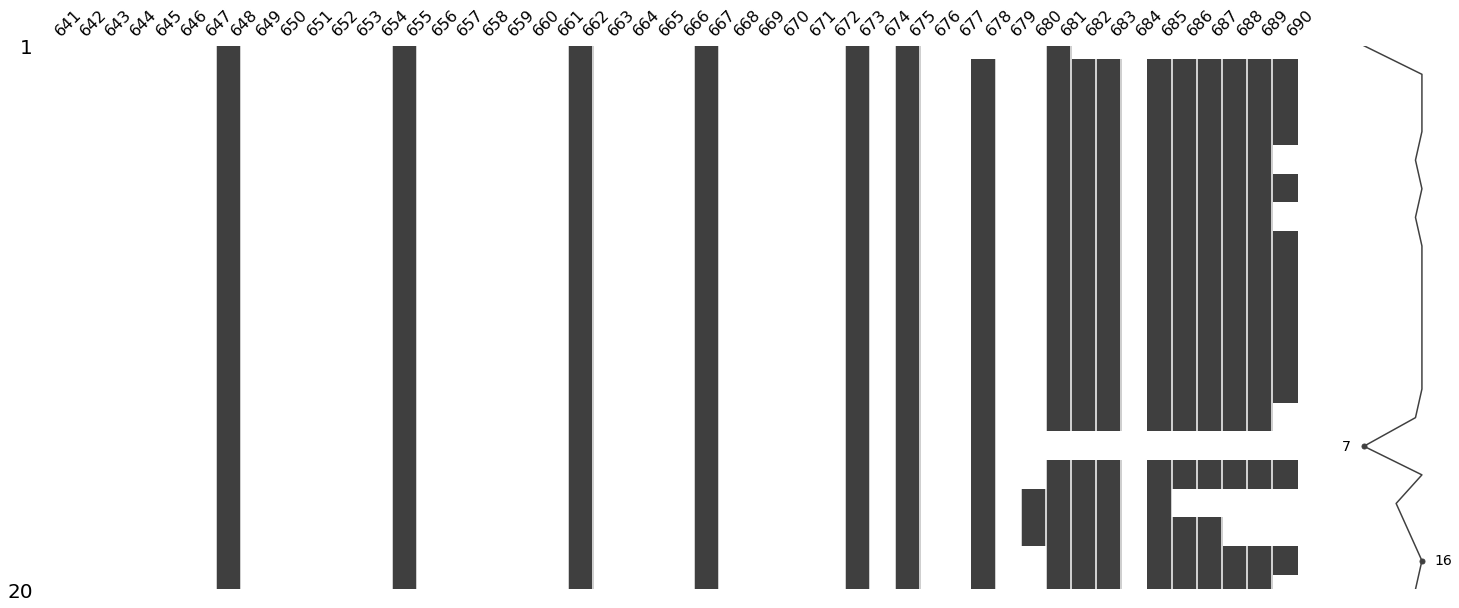

In [50]:
msno.matrix(df.iloc[0:20,640:690])

In [53]:
columns = [647,654,661,666,672,674,677,680,681,682,684,685,686,687,688,689]

In [163]:
W = df.iloc[0:20,columns]

In [167]:
W = W.rename(columns={x:y for x,y in zip(W.columns,range(0,len(W.columns)))})

In [168]:
len(W)

20

In [169]:
len(W.columns)

16

In [170]:
import random

In [172]:
n = 8

#generating random sequence
indexes = random.sample(range(len(W.columns)),n)

In [173]:
#taking the subset of the dataframe
smaller = W.iloc[:,indexes]
#dropping nan rows
smaller = smaller.dropna()

In [174]:
#making the list to be evaluated by value_counts
smaller['Combined']=smaller.values.tolist()

In [175]:
#calculating the parameters for the Entropy
#calculating k
k = smaller['Combined'].value_counts()
#calculating m
m = k.value_counts()
#calculating M
M = k.sum()

In [176]:
smaller

,1,12,10,4,14,8,2,13,Combined
1,Y,I,E,K,R,P,I,S,"[Y, I, E, K, R, P, I, S]"
2,C,V,R,K,A,R,L,T,"[C, V, R, K, A, R, L, T]"
3,F,Y,R,K,A,P,L,G,"[F, Y, R, K, A, P, L, G]"
4,Y,R,V,K,R,G,I,R,"[Y, R, V, K, R, G, I, R]"
5,Y,L,Q,K,A,K,L,D,"[Y, L, Q, K, A, K, L, D]"
6,C,Q,D,K,V,Q,I,D,"[C, Q, D, K, V, Q, I, D]"
7,C,K,Q,K,T,V,I,K,"[C, K, Q, K, T, V, I, K]"
8,I,E,V,K,T,L,V,E,"[I, E, V, K, T, L, V, E]"
9,C,Q,E,K,S,Q,I,Q,"[C, Q, E, K, S, Q, I, Q]"
10,Y,V,E,K,R,E,L,A,"[Y, V, E, K, R, E, L, A]"


In [177]:
k

[I, E, V, K, T, L, V, E]    1
[F, V, E, K, R, G, V, T]    1
[Y, R, V, K, R, G, I, R]    1
[Y, L, L, K, E, R, V, S]    1
[Y, I, E, K, R, P, I, S]    1
[C, V, R, K, A, R, L, T]    1
[W, F, L, K, S, E, V, Q]    1
[C, K, Q, K, T, V, I, K]    1
[Y, L, Q, K, A, K, L, D]    1
[C, Q, D, K, V, Q, I, D]    1
[C, Q, E, K, S, Q, I, Q]    1
[Y, L, S, K, V, T, L, E]    1
[F, Y, R, K, A, P, L, G]    1
[Y, V, E, K, R, E, L, A]    1
[F, L, Q, K, A, I, L, E]    1
[F, E, A, K, V, P, L, T]    1
Name: Combined, dtype: int64

In [178]:
m

1    16
Name: Combined, dtype: int64

In [179]:
M

16

In [180]:
#converting m into a because an array is much easier to handle
a = list(map(list, m.items()))

In [181]:
a

[[1, 16]]

In [182]:
#initializing at 0 because it is  a sum
H_k = 0
#calculating H_k
for element in a:
    #from the definition of H_k
    H_k += ( ( element[0] * element[1] ) / M) * np.log(( element[0] * element[1] ) / M)
    
H_k = -H_k

In [183]:
H_k


-0.0

In [186]:
#initializing at 0 
H_s =  0
for element in a:
    H_s +=  ( ( element[0]) / M) * np.log(( element[0]) / M)
    
    
H_s = -H_s

    

In [187]:
H_s

0.17328679513998632

3

In [ ]:
#combiniamo tutto
W = df.iloc[0:20,columns]
W = W.rename(columns={x:y for x,y in zip(W.columns,range(0,len(W.columns)))})


n = 8

#generating random sequence of indexes
indexes = random.sample(range(len(W.columns)),n)
#generating the complementary array of indexes
other_indexes = list(range(0,len(W.columns)))
for element in indexes:
    if element in other_indexes:
        other_indexes.remove(element)


#taking the subset of the dataframe
smaller = W.iloc[:,indexes]
#dropping nan rows
smaller = smaller.dropna()

#making the list to be evaluated by value_counts
smaller['Combined']=smaller.values.tolist()

#calculating the parameters for the Entropy
#calculating k
k = smaller['Combined'].value_counts()
#calculating m
m = k.value_counts()
#calculating M
M = k.sum()

#converting m into a because an array is much easier to handle
a = list(map(list, m.items()))

#initializing at 0 because it is  a sum
H_k = 0
#calculating H_k
for element in a:
    #from the definition of H_k
    H_k += ( ( element[0] * element[1] ) / M) * np.log(( element[0] * element[1] ) / M)
    
H_k_ref = -H_k
indexes_ref = indexes


rejects = 0
while rejects < 50:
    
    #swap MUST ADD CONDITION to SEE IF THE SEQUENCE HAS ALREADY BEEN USED
    i = random.randint(0,len(indexes))
    j = random.randint(0,len(other_indexes))
    swap = indexes[i]
    indexes[i] = other_indexes[j]
    other_indexes[j] = swap
    #sorting the lists because it is easier to see if they are not already been used
    indexes.sort()
    other_indexes.sort()
    
    smaller = W.iloc[:,indexes]
    smaller = smaller.dropna()

    smaller['Combined']=smaller.values.tolist()


    k = smaller['Combined'].value_counts()
    m = k.value_counts()
    M = k.sum()

    a = list(map(list, m.items()))

    H_k = 0
    for element in a:
        H_k += ( ( element[0] * element[1] ) / M) * np.log(( element[0] * element[1] ) / M)
    
    H_k = -H_k

    #initializing at 0 
    H_s =  0
    for element in a:
        H_s +=  ( ( element[0]) / M) * np.log(( element[0]) / M)
    
    H_s = -H_s
    
    if H_k > H_k_ref:
        H_k_ref = H_k
        indexes_ref = indexes
    
    else:
        rejects += 1
    
    #MUSt ADD THE DATAFRAME TO SAVE THE RESULTS

    